<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/SPX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [136]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 7, 23)


In [137]:
#Get the stock quote
data = yf.download('^GSPC', start=start_date, end=end_date)
#df = web.DataReader('^GSPC', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2021-07-15,4369.020020,4369.020020,4340.700195,4360.029785,4360.029785,3226930000
2021-07-16,4367.430176,4375.089844,4322.529785,4327.160156,4327.160156,3165160000
2021-07-19,4296.399902,4296.399902,4233.129883,4258.490234,4258.490234,4155790000


In [138]:
#Get the number of rows and columns in the data set
data.shape



(392, 6)

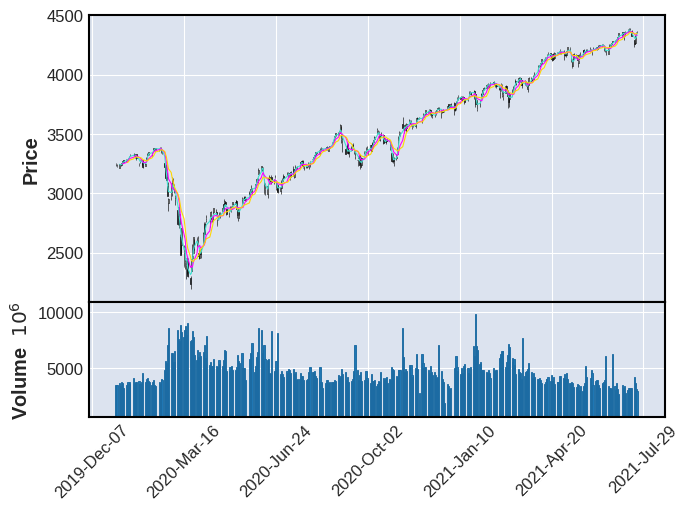

In [139]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [140]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

314

In [141]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.47524029],
       [0.46452881],
       [0.46985192],
       [0.46561386],
       [0.47300483],
       [0.48308754],
       [0.47873316],
       [0.48934208],
       [0.48702282],
       [0.48988238],
       [0.5026989 ],
       [0.50866476],
       [0.50455245],
       [0.50499951],
       [0.5067646 ],
       [0.49276048],
       [0.4686177 ],
       [0.48380476],
       [0.48248209],
       [0.48726034],
       [0.46018364],
       [0.47108136],
       [0.49374785],
       [0.51102586],
       [0.51619069],
       [0.50777517],
       [0.51912939],
       [0.5217653 ],
       [0.53187132],
       [0.52930522],
       [0.53220196],
       [0.5276054 ],
       [0.5349916 ],
       [0.52897458],
       [0.51245098],
       [0.4603559 ],
       [0.41486476],
       [0.40935997],
       [0.34526349],
       [0.33383479],
       [0.39717687],
       [0.35672481],
       [0.41575435],
       [0.36630452],
       [0.34228761],
       [0.23712418],
       [0.30030788],
       [0.234

In [142]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.47524029, 0.46452881, 0.46985192, 0.46561386, 0.47300483,
       0.48308754, 0.47873316, 0.48934208, 0.48702282, 0.48988238,
       0.5026989 , 0.50866476, 0.50455245, 0.50499951, 0.5067646 ,
       0.49276048, 0.4686177 , 0.48380476, 0.48248209, 0.48726034,
       0.46018364, 0.47108136, 0.49374785, 0.51102586, 0.51619069,
       0.50777517, 0.51912939, 0.5217653 , 0.53187132, 0.52930522,
       0.53220196, 0.5276054 , 0.5349916 , 0.52897458, 0.51245098,
       0.4603559 , 0.41486476, 0.40935997, 0.34526349, 0.33383479,
       0.39717687, 0.35672481, 0.41575435, 0.36630452, 0.34228761,
       0.23712418, 0.30030788, 0.23471169, 0.11328083, 0.22057261,
       0.06926598, 0.13589138, 0.0748407 , 0.08009854, 0.03144517,
       0.        , 0.0977679 , 0.11091507, 0.1828729 , 0.14161039])]
[0.18128006945721986]



In [143]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(254, 60, 1)

In [144]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [145]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [146]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

254/254 [==============================] - 10s 28ms/step - loss: 0.0195


In [147]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [148]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [149]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [150]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

121.79405173277243

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


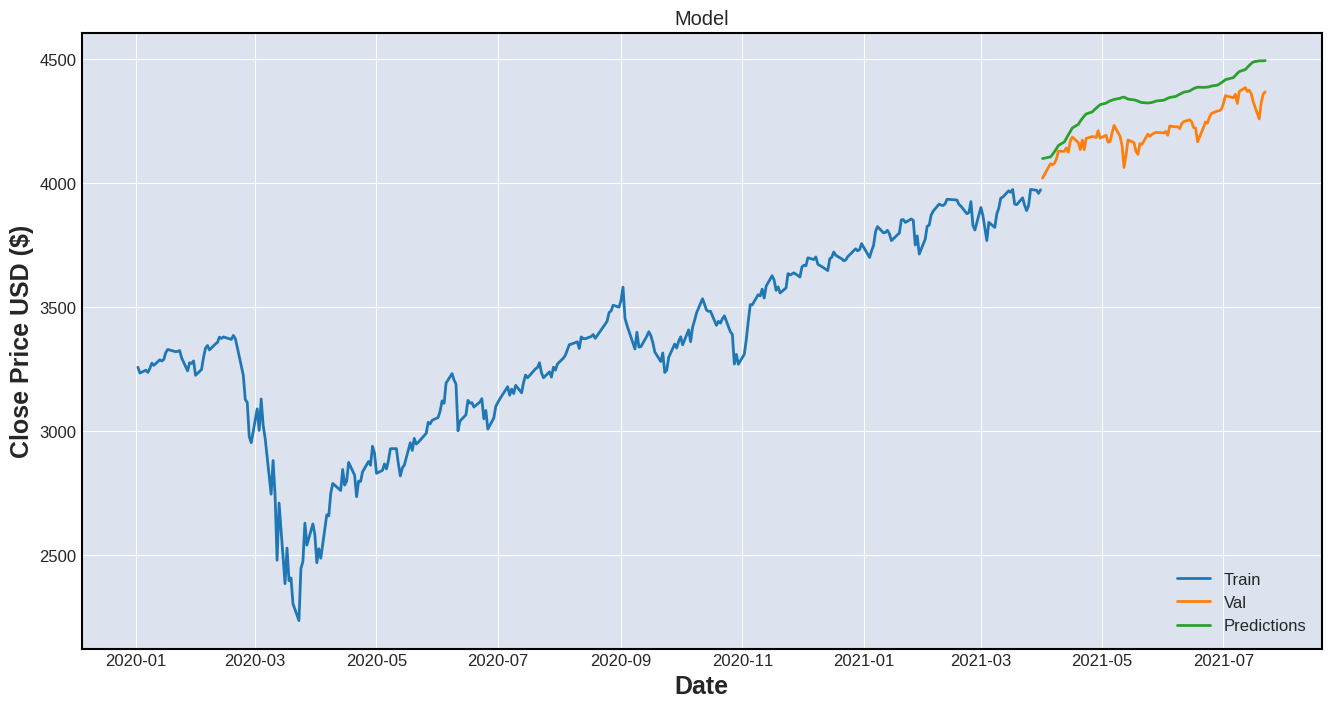

In [151]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [152]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-01,4019.870117,4098.872559
2021-04-05,4077.909912,4105.395508
2021-04-06,4073.939941,4115.123535
2021-04-07,4079.949951,4126.405762
2021-04-08,4097.169922,4138.583008
...,...,...
2021-07-16,4327.160156,4488.291504
2021-07-19,4258.490234,4492.578125
2021-07-20,4323.060059,4492.689941


In [153]:
#get the quote
apple_quote = yf.download('^GSPC', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[4495.49]]
